<a href="https://colab.research.google.com/github/Armaqanal/data_analysis/blob/main/Basic_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from scipy.spatial.distance import euclidean
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("iris_dataset.csv")
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
features = df.columns[:-1]
groups = df.groupby(df['target'])

mean_table = groups[features].mean()
std_table = groups[features].std()
range_table = groups[features].max() - groups[features].min()

print("Mean:")
print(mean_table)
print("\nStandard Deviation:")
print(std_table)
print("\nRange:")
print(range_table)


Mean:
        sepal length (cm)  sepal width (cm)  petal length (cm)  \
target                                                           
0                   5.006             3.428              1.462   
1                   5.936             2.770              4.260   
2                   6.588             2.974              5.552   

        petal width (cm)  
target                    
0                  0.246  
1                  1.326  
2                  2.026  

Standard Deviation:
        sepal length (cm)  sepal width (cm)  petal length (cm)  \
target                                                           
0                0.352490          0.379064           0.173664   
1                0.516171          0.313798           0.469911   
2                0.635880          0.322497           0.551895   

        petal width (cm)  
target                    
0               0.105386  
1               0.197753  
2               0.274650  

Range:
        sepal length (cm)  sepal 

<Axes: ylabel='target-None'>

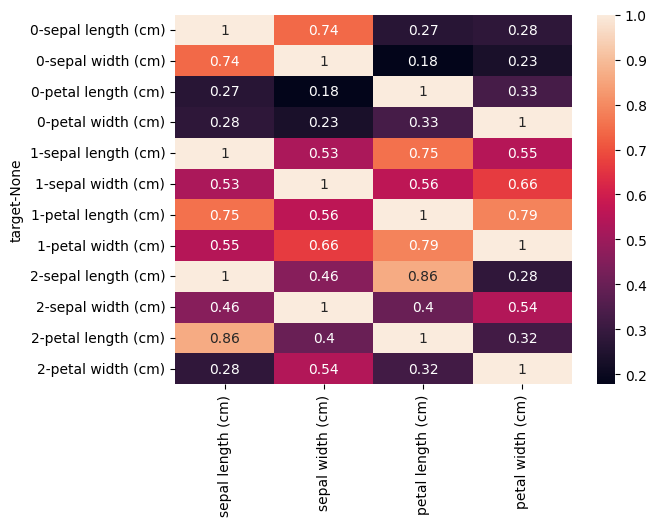

In [ ]:
all_features = ["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]

corr_matrix=groups[all_features].corr()
heat_map=sns.heatmap(corr_matrix,annot=True)
heat_map

In [ ]:
def pairs_with_each_class(df,features,target_col='target', threshold=0.50):
    groups=df.groupby(target_col)
    highest_corr={}

    for class_id, group in groups:
      pairs = []
      corr_matrix=group[features].corr()
      for i in range(len(features)):
        for j in range(i+1, len(features)):
          value = corr_matrix.iloc[i, j]
          if value >= threshold:
            pairs.append((features[i], features[j], value))
      highest_corr[class_id]=pairs
    return highest_corr

features = ["sepal length (cm)", "sepal width (cm)",
            "petal length (cm)", "petal width (cm)"]
pairs_with_each_class(df,features,target_col='target', threshold=0.50)


{0: [('sepal length (cm)',
   'sepal width (cm)',
   np.float64(0.7425466856651594))],
 1: [('sepal length (cm)', 'sepal width (cm)', np.float64(0.5259107172828247)),
  ('sepal length (cm)', 'petal length (cm)', np.float64(0.754048958592016)),
  ('sepal length (cm)', 'petal width (cm)', np.float64(0.54646107159863)),
  ('sepal width (cm)', 'petal length (cm)', np.float64(0.5605220916929821)),
  ('sepal width (cm)', 'petal width (cm)', np.float64(0.6639987200241112)),
  ('petal length (cm)', 'petal width (cm)', np.float64(0.786668088522817))],
 2: [('sepal length (cm)',
   'petal length (cm)',
   np.float64(0.8642247329355763)),
  ('sepal width (cm)', 'petal width (cm)', np.float64(0.5377280262661884))]}

Q5

In [ ]:
features = ["sepal length (cm)", "sepal width (cm)","target"]
df=pd.DataFrame(df,columns=features)
df.head()

,sepal length (cm),sepal width (cm),target
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


In [ ]:
p_test=df.iloc[-1,:-1]
training_features=df.iloc[:-1,:-1]
true_class = df.iloc[:-1, -1]

distances=[]
for i in range(len(training_features)):
  print(training_features)
  dist=euclidean(p_test,training_features.iloc[i])
  distances.append(dist)
distances

     sepal length (cm)  sepal width (cm)
0                  5.1               3.5
1                  4.9               3.0
2                  4.7               3.2
3                  4.6               3.1
4                  5.0               3.6
..                 ...               ...
144                6.7               3.3
145                6.7               3.0
146                6.3               2.5
147                6.5               3.0
148                6.2               3.4

[149 rows x 2 columns]
     sepal length (cm)  sepal width (cm)
0                  5.1               3.5
1                  4.9               3.0
2                  4.7               3.2
3                  4.6               3.1
4                  5.0               3.6
..                 ...               ...
144                6.7               3.3
145                6.7               3.0
146                6.3               2.5
147                6.5               3.0
148                6.2           

[0.943398113205661,
 1.0,
 1.216552506059644,
 1.3038404810405304,
 1.081665382639197,
 1.0295630140987,
 1.360147050873545,
 0.9848857801796108,
 1.503329637837291,
 1.004987562112089,
 0.8602325267042629,
 1.170469991071963,
 1.1000000000000005,
 1.6000000000000005,
 1.0049875621120892,
 1.4142135623730954,
 1.0295630140987,
 0.943398113205661,
 0.824621125123532,
 1.1313708498984765,
 0.6403124237432848,
 1.0630145812734655,
 1.431782106327636,
 0.8544003745317538,
 1.170469991071963,
 0.9000000000000004,
 0.9848857801796108,
 0.8602325267042629,
 0.806225774829855,
 1.216552506059644,
 1.1045361017187265,
 0.6403124237432848,
 1.3038404810405295,
 1.264911064067352,
 1.004987562112089,
 0.9219544457292891,
 0.6403124237432851,
 1.1661903789690602,
 1.5,
 0.8944271909999165,
 1.0295630140987004,
 1.5652475842498532,
 1.5132745950421556,
 1.0295630140987004,
 1.1313708498984765,
 1.1000000000000005,
 1.1313708498984765,
 1.3152946437965913,
 0.9219544457292892,
 0.9486832980505141,
 

kNN

In [ ]:
min_distance=min(distances)
min_index = distances.index(min_distance)
nearest_neighbor = training_features.iloc[min_index]
predicted_class = true_class.iloc[min_index]

print(nearest_neighbor,predicted_class)
#missclasification --->k=1

sepal length (cm)    5.9
sepal width (cm)     3.0
Name: 61, dtype: float64 1


In [ ]:
min_distance_three=sorted(enumerate(distances),key=lambda x:x[1])[:3]
three_distances=[d for i,d in min_distance_three]
three_index=[i for i,d in min_distance_three]
nearest_neighbors = training_features.iloc[three_index]
predicted_class = true_class.iloc[three_index]
print(nearest_neighbors,f"\n{predicted_class}")


     sepal length (cm)  sepal width (cm)
61                 5.9               3.0
138                6.0               3.0
78                 6.0               2.9 
61     1
138    2
78     1
Name: target, dtype: int64
